In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
data = pd.read_csv('csgo_round_snapshots.csv')

In [193]:
data.shape

(122410, 97)

In [194]:
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [196]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [197]:
data.isna().any().any()

False

In [198]:
Y = data['round_winner']
X = data.drop('round_winner', axis=1)
feature_names = X.columns
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
Y.unique()

array(['CT', 'T'], dtype=object)

In [200]:
Y.replace('CT', 0, inplace=True)
Y.replace('T', 1, inplace=True)

In [201]:
Y.unique()

array([0, 1], dtype=int64)

In [202]:
rounds_played = Y.value_counts()
ct_rounds_won = rounds_played[0]
t_rounds_won = rounds_played[1]
print(ct_rounds_won, t_rounds_won)

60004 62406


[]

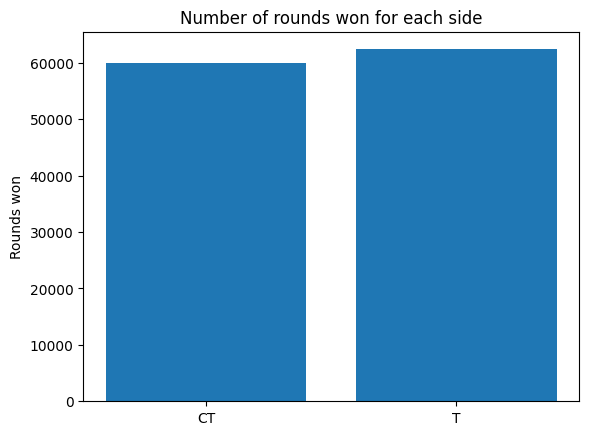

In [203]:
plt.bar(['CT', 'T'], [ct_rounds_won, t_rounds_won])
plt.title('Number of rounds won for each side')
plt.ylabel('Rounds won')
plt.plot()

In [204]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(col)
    print(data[col].unique())

map
['de_dust2' 'de_mirage' 'de_nuke' 'de_inferno' 'de_overpass' 'de_vertigo'
 'de_train' 'de_cache']


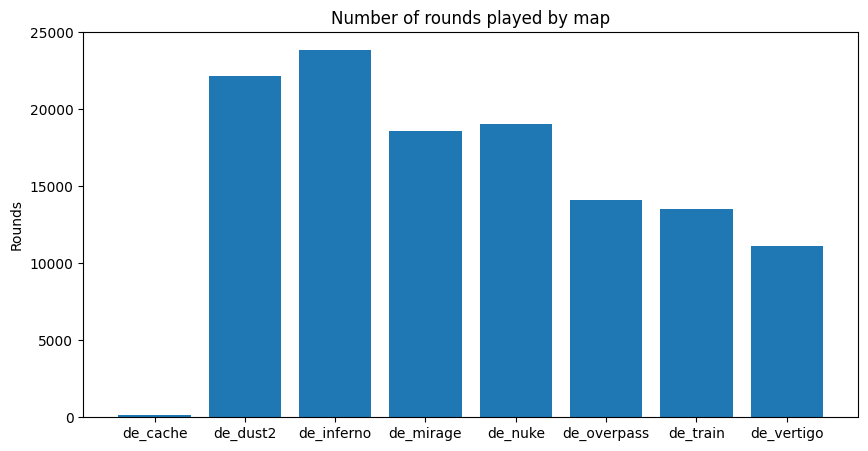

In [205]:
maps = data['map'].unique()
maps.sort()

map_wins = data.groupby(['map']).size()

plt.figure(figsize=(10,5))
plt.bar(maps, map_wins)
plt.title('Number of rounds played by map')
plt.ylabel('Rounds')
plt.show()

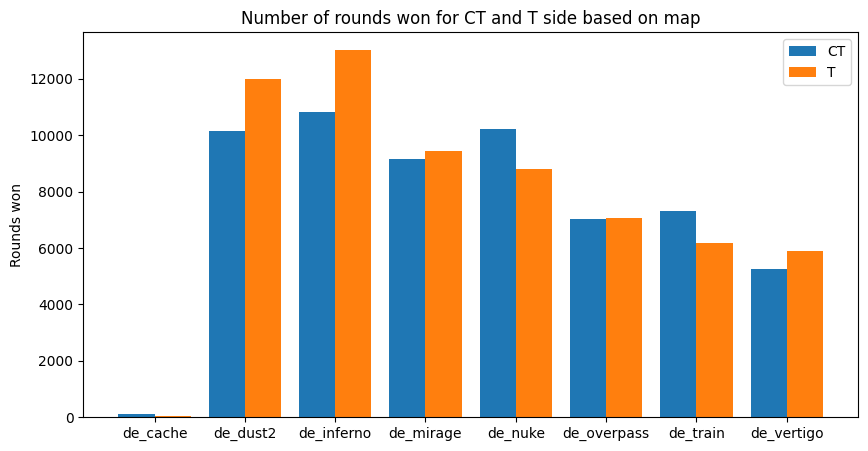

In [206]:
map_side_wins = data.groupby(['map', 'round_winner']).size().unstack()

ct_wins = map_side_wins[0]
t_wins = map_side_wins[1]

bar_width = 0.4
i = np.arange(len(maps))
plt.figure(figsize=(10,5))

plt.bar(i, ct_wins, width=bar_width, label='CT')
plt.bar(i + bar_width, t_wins, width=bar_width, label='T')

plt.ylabel('Rounds won')
plt.title('Number of rounds won for CT and T side based on map')
plt.xticks(i + bar_width / 2, maps)
plt.legend()
plt.show()

In [207]:
# maps_dict = {}
# i = 0

# for map in maps:
#     maps_dict[map] = i
#     i += 1

# data['map'].replace(maps_dict, inplace=True)
# data

In [208]:
boolean_columns = data.select_dtypes(include=['boolean']).columns

for col in boolean_columns:
    print(col)
    print(data[col].unique())

bomb_planted
[False  True]


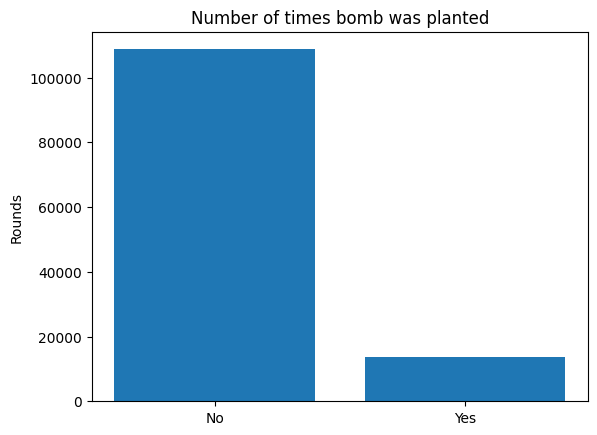

In [209]:
times_planted = data.groupby(['bomb_planted']).size()

plt.bar(['No', 'Yes'], times_planted)
plt.title('Number of times bomb was planted')
plt.ylabel('Rounds')
plt.show()

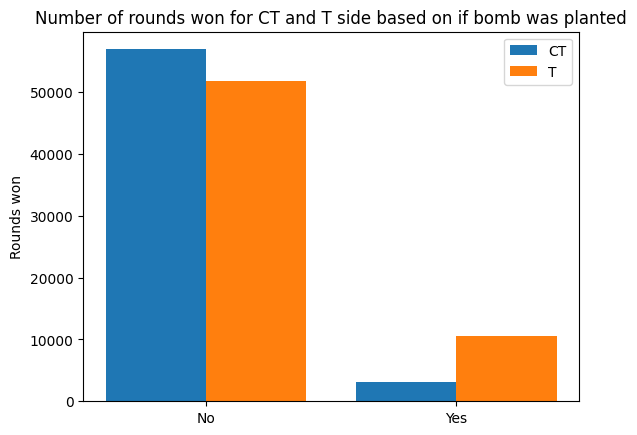

In [210]:
bomb_planted_wins = data.groupby(['bomb_planted', 'round_winner']).size().unstack()

ct_wins = bomb_planted_wins[0]
t_wins = bomb_planted_wins[1]

i = np.arange(2)

plt.bar(i, ct_wins, width=bar_width, label='CT')
plt.bar(i + bar_width, t_wins, width=bar_width, label='T')

plt.ylabel('Rounds won')
plt.title('Number of rounds won for CT and T side based on if bomb was planted')
plt.xticks(i + bar_width / 2, ['No', 'Yes'])
plt.legend()
plt.show()

In [211]:
# data.replace({True: 1, False:0}, inplace=True)
# data

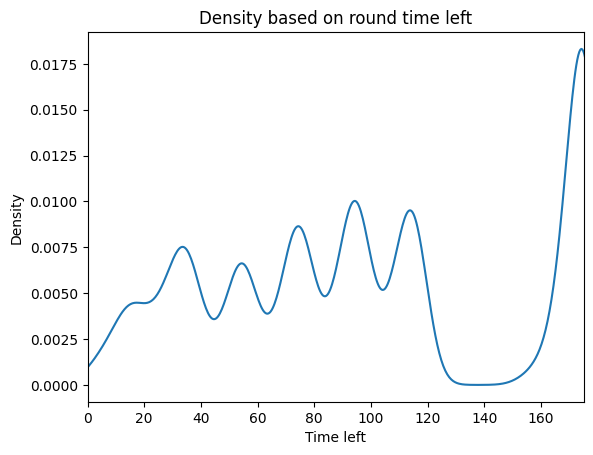

In [304]:
plt.figure()
data['time_left'].plot(kind='density')
plt.xlabel('Time left')
plt.ylabel('Density')
plt.title('Density based on round time left')
plt.xlim([0, 175])
plt.show()

In [310]:
full_health = data[(data['t_health'] == 500) & (data['ct_health'] == 500)]

ct_score_shifted = full_health['ct_score'].shift(1)
t_score_shifted = full_health['t_score'].shift(1)

round_start = full_health[(full_health['ct_score'] != ct_score_shifted) | (full_health['t_score'] != t_score_shifted)]

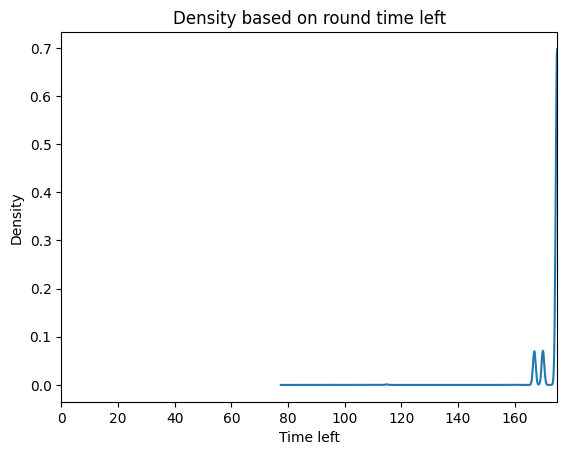

In [308]:
plt.figure()
round_start['time_left'].plot(kind='density')
plt.xlabel('Time left')
plt.ylabel('Density')
plt.title('Density based on round time left')
plt.xlim([0, 175])
plt.show()

In [246]:
t_weapons = [col for col in data.columns if (col.startswith('t_weapon') and col != 't_weapon_glock' and col != 't_weapon_usps' and col != 't_weapon_p2000')]
ct_weapons = [col for col in data.columns if (col.startswith('ct_weapon') and col != 'ct_weapon_glock' and col != 'ct_weapon_usps' and col != 'ct_weapon_p2000')]

<Axes: title={'center': 'Weapon usage on start of the round'}, ylabel='Weapon'>

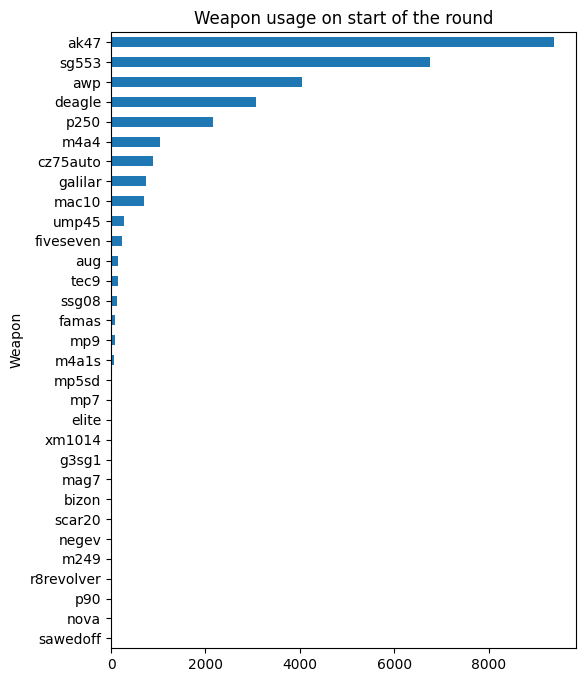

In [302]:
t_weapons_count = round_start[t_weapons].sum()
t_weapons_count.sort_values(inplace=True)
t_weapons_count.index = t_weapons_count.index.str.replace('t_weapon_', '')

plt.figure(figsize=(6, 8))
plt.title('Weapon usage on start of the round')
plt.ylabel('Weapon')
t_weapons_count.plot.barh()

<Axes: title={'center': 'Weapon usage on start of the round'}, ylabel='Weapon'>

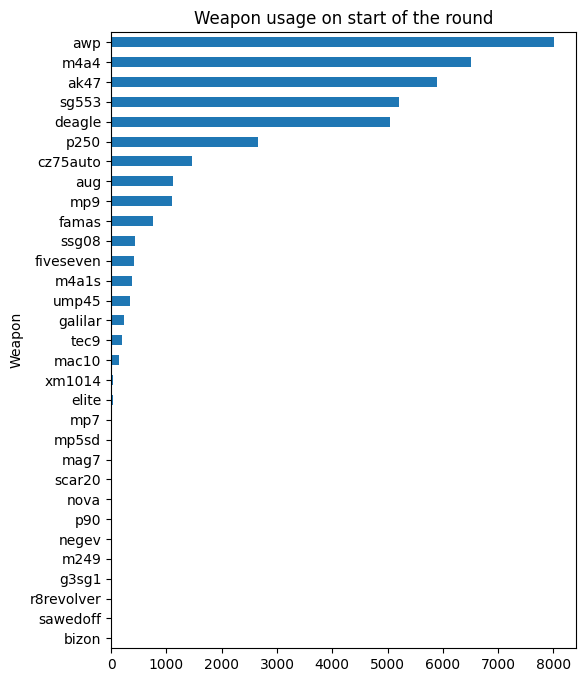

In [303]:
ct_weapons_count = round_start[ct_weapons].sum()
ct_weapons_count.sort_values(inplace=True)
ct_weapons_count.index = ct_weapons_count.index.str.replace('ct_weapon_', '')

plt.figure(figsize=(6,8))
plt.title('Weapon usage on start of the round')
plt.ylabel('Weapon')
ct_weapons_count.plot.barh()